<a href="https://colab.research.google.com/github/NayiraKhotimah97/tensorflow/blob/main/chihuahuanjing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from torchvision import transforms
from PIL import Image
import torch

In [ ]:
path = '/content/drive/MyDrive/archive/test/chihuahua/img_0_1082.jpg'
img = image.load_img(path)

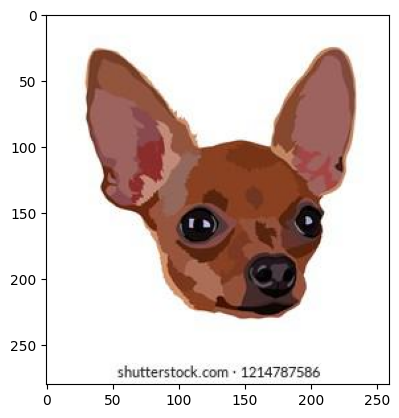

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread(path).shape

(280, 260, 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
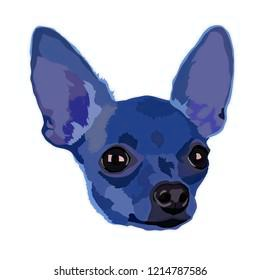

In [ ]:
cv2.imread(path)

In [ ]:
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1184 images belonging to 2 classes.
Found 4733 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'chihuahua': 0, 'muffin': 1}

In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1886s 52s/step - accuracy: 0.4989 - loss: 0.8321 - val_accuracy: 0.7054 - val_loss: 0.5971
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 215s 4s/step - accuracy: 0.6890 - loss: 0.5932 - val_accuracy: 0.7600 - val_loss: 0.4870
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 0.7684 - loss: 0.4970 - val_accuracy: 0.7795 - val_loss: 0.4604
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.7829 - loss: 0.4906 - val_accuracy: 0.7781 - val_loss: 0.4745
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.8154 - loss: 0.4357 - val_accuracy: 0.8119 - val_loss: 0.4151
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.8231 - loss: 0.4363 - val_accuracy: 0.8159 - val_loss: 0.4361
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.8332 - loss: 0.4019 - val_accuracy: 0.8548 - val_loss: 0.3565
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 209s 4s/step - accuracy: 0.8707 - loss: 0.3223 - val_accuracy: 0.8716 -

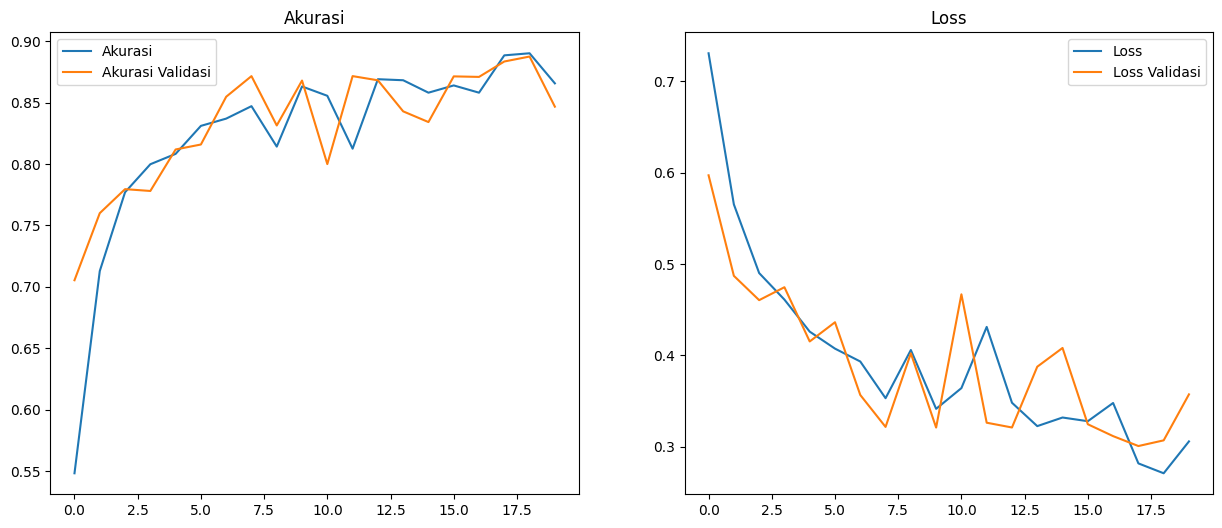

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("Akurasi")
plt.plot(history.history["accuracy"], label="Akurasi")
plt.plot(history.history["val_accuracy"], label="Akurasi Validasi")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Loss")
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Loss Validasi")
plt.legend()

plt.show()

In [ ]:
image_path = '/content/drive/MyDrive/archive/test/chihuahua/img_0_1082.jpg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

In [ ]:
image_path = '/content/drive/MyDrive/archive/test/chihuahua/img_0_1082.jpg'

img = load_img(image_path, target_size=(150, 150))
img_array = img_to_array(img) / 255.0
input_batch = np.expand_dims(img_array, axis=0)

output = model.predict(input_batch)

predicted_class = (output > 0.5).astype("int32")
class_names = ['chihuahua', 'muffin']
predicted_class_name = class_names[predicted_class.item()]
print(f'The predicted class is: {predicted_class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
The predicted class is: chihuahua


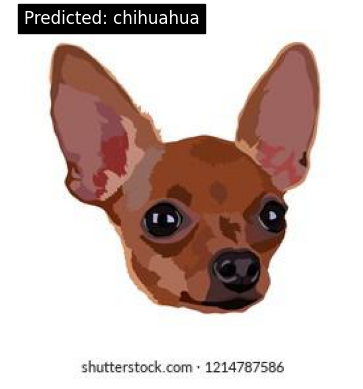

In [ ]:
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', color='white', fontsize=12, backgroundcolor='black')
plt.show()